<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/Pytorch_Tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Pytorch object use Cuda

In [34]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [35]:
# check for GPU with Pytorch

import torch
torch.cuda.is_available()

False

In [36]:
# Device Agnostic code
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [37]:
tensor1 = torch.tensor([1,23,34])
tensor1

tensor([ 1, 23, 34])

In [38]:
tensor_on_gpu = tensor1.to(device)
tensor_on_gpu

tensor([ 1, 23, 34])

In [39]:
## Numpy
tensor_on_gpu.cpu().numpy()

array([ 1, 23, 34])

## Exercises and Curriculum

In [40]:
torch.rand([7,7])

tensor([[0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816, 0.9998],
        [0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600],
        [0.2846, 0.2007, 0.5014, 0.3139, 0.4654, 0.1612, 0.1568],
        [0.2083, 0.3289, 0.1054, 0.9192, 0.4008, 0.9302, 0.6558],
        [0.0766, 0.8460, 0.3624, 0.3083, 0.0850, 0.0029, 0.6431],
        [0.3908, 0.6947, 0.0897, 0.8712, 0.1330, 0.4137, 0.6044],
        [0.7581, 0.9037, 0.9555, 0.1035, 0.6258, 0.2849, 0.4452]])

In [41]:
random_seed = 42
SEED = torch.manual_seed(random_seed)
a = torch.rand([7,7])
b = torch.rand([7,7])
torch.matmul(a,b)

tensor([[2.6637, 2.0426, 3.2242, 0.8659, 1.6420, 1.8317, 2.0220],
        [3.0324, 2.3639, 3.7553, 0.7506, 1.6955, 2.3543, 2.2479],
        [2.0545, 1.8111, 2.4874, 1.1800, 1.3461, 1.6582, 1.6263],
        [1.2061, 1.2405, 1.5288, 0.9969, 0.9076, 1.1420, 1.0550],
        [1.7111, 1.7710, 2.1770, 1.2673, 1.0596, 1.9356, 1.3243],
        [2.2473, 2.0134, 2.7834, 1.2568, 1.5264, 1.8804, 1.8302],
        [2.5960, 2.5335, 3.4685, 1.3261, 1.7587, 2.5078, 2.1685]])

# Pytorch Workflow

### 1. Data (prepare and load)
### 2. Build Model
### 3. Fit the model to the data (training)
### 4. Evaluate the model (test)
### 5. Deploy on Azure

In [42]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
torch.__version__



'2.3.1+cu121'

In [44]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED) #w=100
X = torch.rand(1,100).mul(100).floor()
y = X + 10

In [45]:
X,y

(tensor([[88., 91., 38., 95., 39., 60., 25., 79., 94., 13., 93., 59., 86., 56.,
          74., 42., 88., 57., 26., 62., 26., 44., 29., 83., 10., 26., 35., 19.,
          54.,  0., 95.,  7., 88., 58., 33., 80., 57., 90., 55., 34., 63., 36.,
          71., 94., 78., 28., 78., 58., 75., 19.,  0., 30., 11., 91., 64., 70.,
          65., 49., 89., 14., 53., 15., 65., 32., 65., 39., 91., 20., 20., 20.,
          94., 66., 98.,  8.,  0., 10., 16., 70., 67., 91., 24., 15., 76., 29.,
          80., 38., 78., 11., 24., 65., 60., 37., 79., 83., 13., 23., 95., 33.,
          32.,  1.]]),
 tensor([[ 98., 101.,  48., 105.,  49.,  70.,  35.,  89., 104.,  23., 103.,  69.,
           96.,  66.,  84.,  52.,  98.,  67.,  36.,  72.,  36.,  54.,  39.,  93.,
           20.,  36.,  45.,  29.,  64.,  10., 105.,  17.,  98.,  68.,  43.,  90.,
           67., 100.,  65.,  44.,  73.,  46.,  81., 104.,  88.,  38.,  88.,  68.,
           85.,  29.,  10.,  40.,  21., 101.,  74.,  80.,  75.,  59.,  99.,  24.,
       

In [46]:
X.numpy()[0][0]

88.0

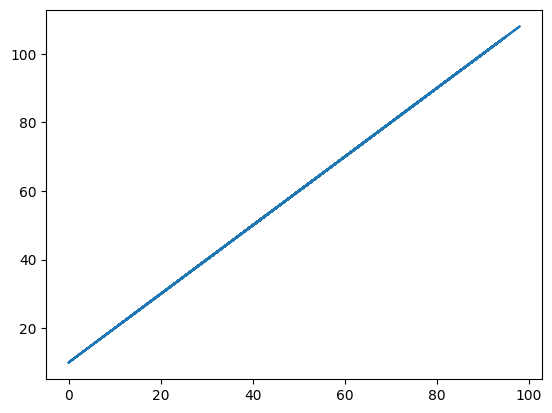

In [47]:
plt.plot(X.numpy()[0],y.numpy()[0])
plt.show()

In [48]:
len(X[0])

100

In [49]:
train_splot = 0.8
train_size = int(train_splot*len(X[0]))
train_size

80

In [50]:
X_train,y_train = X[0][:train_size],y[0][:train_size]
X_test,y_test = X[0][train_size:],y[0][train_size:]

In [51]:
len(y_train)

80

In [52]:
X_test

tensor([24., 15., 76., 29., 80., 38., 78., 11., 24., 65., 60., 37., 79., 83.,
        13., 23., 95., 33., 32.,  1.])

In [53]:
y_test

tensor([ 34.,  25.,  86.,  39.,  90.,  48.,  88.,  21.,  34.,  75.,  70.,  47.,
         89.,  93.,  23.,  33., 105.,  43.,  42.,  11.])

In [54]:
class LineaRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True))

    def forward(self,x) -> torch.Tensor:
        return self.weights*x + self.bias


In [55]:
## Pytorch model building essentials

model_0 = LineaRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.2858], requires_grad=True),
 Parameter containing:
 tensor([-1.0935], requires_grad=True)]

In [56]:
### MAke predicgions using torch.inference_mode()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([ -7.9516,  -5.3798, -22.8109,  -9.3804, -23.9539, -11.9522, -23.3824,
         -4.2368,  -7.9516, -19.6676, -18.2388, -11.6664, -23.6682, -24.8112,
         -4.8083,  -7.6659, -28.2402, -10.5234, -10.2377,  -1.3793])

In [57]:
import math

In [58]:
math.exp(-5.3798)

0.004608743586541331

In [59]:
y_test

tensor([ 34.,  25.,  86.,  39.,  90.,  48.,  88.,  21.,  34.,  75.,  70.,  47.,
         89.,  93.,  23.,  33., 105.,  43.,  42.,  11.])

In [66]:
# how does model perform use loss function

loss_fn = nn.L1Loss()
optimizer = optim.SGD(params=model_0.parameters(),lr=0.01)
# loss = loss_fn(y_preds,y_test,input_lenths=len())
# loss

In [71]:
epochs = 5000

for epoch in range(epochs):
    ## training
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ## testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)

In [72]:
y_test


tensor([ 34.,  25.,  86.,  39.,  90.,  48.,  88.,  21.,  34.,  75.,  70.,  47.,
         89.,  93.,  23.,  33., 105.,  43.,  42.,  11.])

In [76]:
loss

tensor(25.6004, grad_fn=<MeanBackward0>)

In [73]:
test_pred


tensor([ 30.8109,  21.5640,  84.2369,  35.9480,  88.3466,  45.1948,  86.2917,
         17.4543,  30.8109,  72.9352,  67.7981,  44.1674,  87.3192,  91.4289,
         19.5092,  29.7834, 103.7579,  40.0577,  39.0302,   7.1801])

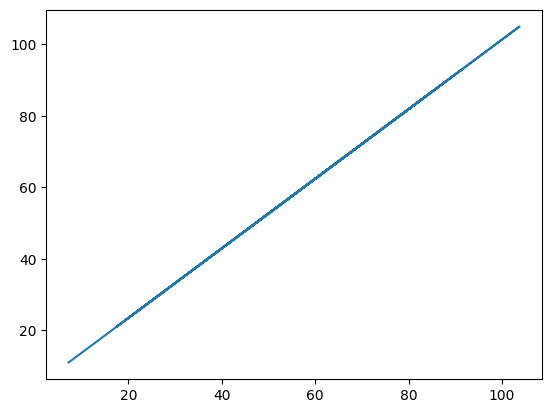

In [75]:
plt.plot(test_pred.numpy(),y_test.numpy())
plt.show()